## KNN

In [28]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])

[ 5.1  3.5  1.4  0.2] [ 5.7  2.6  3.5  1. ] [ 6.3  3.3  6.   2.5]
0 1 2


In [33]:
#there are 7 toy datasets, when you load them, remember to add bracket
datasets.load_boston()  #regression
datasets.load_iris()   #classification
datasets.load_diabetes()   #regression
datasets.load_digits()    #classification
datasets.load_linnerud()   #regression
datasets.load_wine()  #classification
datasets.load_breast_cancer() #classification

{'DESCR': 'Linnerrud dataset\n=================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 20\n    :Number of Attributes: 3\n    :Missing Attribute Values: None\n\nThe Linnerud dataset constains two small dataset:\n\n- *exercise*: A list containing the following components: exercise data with\n  20 observations on 3 exercise variables: Weight, Waist and Pulse.\n\n- *physiological*: Data frame with 20 observations on 3 physiological variables:\n   Chins, Situps and Jumps.\n\nReferences\n----------\n  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.\n',
 'data': array([[   5.,  162.,   60.],
        [   2.,  110.,   60.],
        [  12.,  101.,  101.],
        [  12.,  105.,   37.],
        [  13.,  155.,   58.],
        [   4.,  101.,   42.],
        [   8.,  101.,   38.],
        [   6.,  125.,   40.],
        [  15.,  200.,   40.],
        [  17.,  251.,  250.],
        [  17.,  120.,   38.],
        [  13.,  210.,  11

In [2]:
iris_data[0] #the row index
iris_data[0,] #the same

array([ 5.1,  3.5,  1.4,  0.2])

In [154]:
iris_labels[0]

0

In [43]:
np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]] 
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[ 6.1  2.8  4.7  1.2]
 [ 5.7  3.8  1.7  0.3]
 [ 7.7  2.6  6.9  2.3]
 [ 6.   2.9  4.5  1.5]] [1 0 2 1]
[[ 5.7  2.8  4.1  1.3]
 [ 6.5  3.   5.5  1.8]
 [ 6.3  2.3  4.4  1.3]
 [ 6.4  2.9  4.3  1.3]] [1 2 1 1]


In [4]:
?np.random.seed #should have the same function as seed in R

In [39]:
a = [1,2,3,4,5] 
a[:-1]
a[:-2] #remember in python, a[c:d] doesn't include d
a[-1:]
a[-2:] #begin from the last second number
a[-1] #in python, negative doesn't mean "remove", but opposite direction


5

In [ ]:
a[-1:] #[5]
a[-1] #5


In [6]:
a[:-2]

[1, 2, 3]

In [155]:
?np.random.permutation

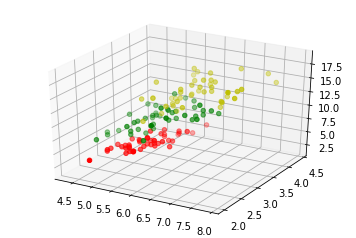

In [152]:
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = [] #you need to define X as a list before you put other lists in it
for iclass in range(3):
    X.append([[], [], []]) #there is a round bracket, because you use append function
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0]) #python stores data in a horizontal direction
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass]) 
        #this color syntax is similar to the one in r: 
        #col = c("green3","red")[(iris.valid$Species != fit)+1]
plt.show()

In [153]:
X

[[[5.7000000000000002,
   5.4000000000000004,
   4.7999999999999998,
   5.5,
   4.9000000000000004,
   5.0999999999999996,
   4.7000000000000002,
   5.0,
   4.7999999999999998,
   4.7999999999999998,
   4.5999999999999996,
   5.7000000000000002,
   4.7999999999999998,
   4.4000000000000004,
   5.2000000000000002,
   5.0,
   5.2000000000000002,
   5.4000000000000004,
   5.4000000000000004,
   5.0999999999999996,
   5.2000000000000002,
   5.0,
   5.0999999999999996,
   4.7999999999999998,
   5.0,
   5.0999999999999996,
   5.0999999999999996,
   4.5999999999999996,
   5.5,
   5.4000000000000004,
   5.0,
   5.0,
   4.9000000000000004,
   5.0,
   5.0,
   4.4000000000000004,
   4.2999999999999998,
   4.5999999999999996,
   5.0999999999999996,
   4.4000000000000004,
   4.5999999999999996,
   4.7000000000000002,
   5.0999999999999996,
   4.5,
   5.2999999999999998,
   5.0999999999999996,
   4.9000000000000004,
   4.9000000000000004],
  [3.7999999999999998,
   3.3999999999999999,
   3.0,
   3.5

In [172]:
#the other way to reduce learnset data to three dim and visualize it 
x = []
for iclass in range(3):
    x.append([])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            x[iclass].append(learnset_data[i])  #you can't use sum here, cuz every time you iterate iclass
            #the structure of x changes

for i in range(3):
    for j in range(len(x[i])):
        x[i][j][2] = sum(x[i][j][2:])
        x[i][j] = np.delete(x[i][j],3)
        
x

[[array([ 5.7,  3.8,  4.4]),
  array([ 5.4,  3.4,  3.5]),
  array([ 4.8,  3. ,  1.9]),
  array([ 5.5,  3.5,  2.3]),
  array([ 4.9,  3.1,  2. ]),
  array([ 5.1,  3.8,  3. ]),
  array([ 4.7,  3.2,  2.6]),
  array([ 5. ,  3.4,  3.6]),
  array([ 4.8,  3. ,  2.9]),
  array([ 4.8,  3.1,  2.6]),
  array([ 4.6,  3.6,  2. ]),
  array([ 5.7,  4.4,  3.5]),
  array([ 4.8,  3.4,  2.6]),
  array([ 4.4,  3.2,  2.3]),
  array([ 5.2,  3.5,  2.5]),
  array([ 5. ,  3.6,  2.4]),
  array([ 5.2,  4.1,  2. ]),
  array([ 5.4,  3.9,  3.3]),
  array([ 5.4,  3.7,  2.5]),
  array([ 5.1,  3.5,  2.4]),
  array([ 5.2,  3.4,  2.4]),
  array([ 5. ,  3.5,  2.8]),
  array([ 5.1,  3.8,  3.9]),
  array([ 4.8,  3.4,  2.9]),
  array([ 5. ,  3. ,  2.6]),
  array([ 5.1,  3.3,  4.2]),
  array([ 5.1,  3.4,  2.5]),
  array([ 4.6,  3.2,  2.4]),
  array([ 5.5,  4.2,  2.4]),
  array([ 5.4,  3.9,  3.7]),
  array([ 5. ,  3.3,  2.4]),
  array([ 5. ,  3.2,  2.2]),
  array([ 4.9,  3.1,  2. ]),
  array([ 5. ,  3.4,  2.5]),
  array([ 5. ,

In [163]:
x = []
for iclass in range(3):
    x.append([])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            x[iclass].append(learnset_data[i])  #you can't use sum here, cuz every time you iterate iclass
            #the structure of x changes
x[1]

x[1][0][2] = sum(x[1][0][2:]) 
x[1][0]

array([  6.1,   2.8,  11.9,   1.2])

In [164]:
learnset_data[0]

array([  6.1,   2.8,  11.9,   1.2])

In [171]:
s = np.array([1,2,3,4,5])
np.delete(s, 3)
s[0] = sum(s[3:])
s

array([9, 2, 3, 4, 5])

In [126]:
m = [1,2,3,4,5]
m[0] = sum(m[:3])
m #it works
m.pop(m[1])
m

[6, 2, 4, 5]

In [131]:
n = [1,2,3,5,6,7,8,9]

del n[1:3]
n

n.remove(8)  #remove 要明确表示删的哪个值
n

[1, 5, 6, 7, 9]

In [81]:
c = []
c.append([])
c.append([])
c

[[], []]

In [78]:
learnset_data[0][0]


6.0999999999999996

In [8]:
range(3)

range(0, 3)

In [55]:
learnset_data[0][0] #the first element in the second row

6.0999999999999996

In [10]:
?plt.figure().add_subplot()

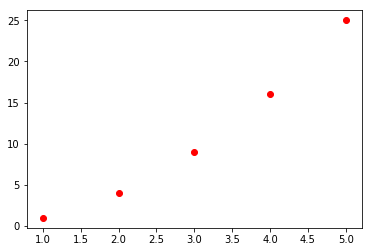

In [85]:
#it seems these steps are required if you wanna do the plot in python
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
fig = plt.figure() #first
ax = fig.add_subplot(111) #then add_subplot
ax.scatter(x, y, color="r") #like the example above, you can use loop to color values in different classes 
plt.show() #must-have at the end

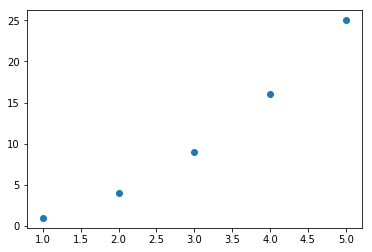

In [90]:
plt.figure().add_subplot(111).scatter(x, y) #this can show the graph too, but comes out with <matplotlib> label
plt.show() #the label is gone


In [32]:
learnset_data[0][0]

6.0999999999999996

In [92]:
#exam how append() works
Y = []
Y.append([[],[],[]])
Y[0][0].append(1)
Y

[[[1], [], []]]

In [94]:
Y[0][0].append(2)
Y

[[[1, 2, 2], [], []]]

In [43]:
#determine the neighbors
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2) 
# just np.linalg.norm(x - y)) will give you Euclidean distance between the vectors x and y.
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.472135955
3.41906419946


In [44]:
strange_list = [(1, 2), [1, 2], '12', 12, 12.0]

In [45]:
strange_list[0:1]

[(1, 2)]

In [46]:
strange_list[0]

(1, 2)

In [47]:
strange_list[2]

'12'

In [48]:
strange_list[2:3]

['12']

In [96]:
c = []
c.append([1,2])
c.append([5,6,7,7])
c

[[1, 2], [5, 6, 7, 7]]

In [57]:
?np.linalg.norm
?np.zeros #Return a new array of given shape and type, filled with zeros.
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [55]:
np.zeros(5, dtype=np.int)

array([0, 0, 0, 0, 0])

In [56]:
np.zeros((2,1))

array([[ 0.],
       [ 0.]])

In [59]:
?np.linalg.norm

In [65]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index]) 
        #for each test instance, calculate its distance with all other training set value 
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1]) #key means sort by...here it means sort distances by 
    #the second value in distance
    neighbors = distances[:k]
    return neighbors



In [105]:
?np.sort  #default sorting direction is descending

In [131]:
for i in range(5):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          testset_data[i], 
          testset_labels[i], 
          neighbors)
#using testdata here just want to see those test data's neighbors
#this result is too good..the closet three labels are the same as test lable..
#although in the output, the format of testset_data is list, in definition of testdata, it already converts its format to array

0 [ 5.7  2.8  4.1  1.3] 1 [(array([ 5.7,  2.9,  4.2,  1.3]), 0.14142135623730995, 1), (array([ 5.6,  2.7,  4.2,  1.3]), 0.17320508075688815, 1), (array([ 5.6,  3. ,  4.1,  1.3]), 0.22360679774997935, 1)]
1 [ 6.5  3.   5.5  1.8] 2 [(array([ 6.4,  3.1,  5.5,  1.8]), 0.14142135623730931, 2), (array([ 6.3,  2.9,  5.6,  1.8]), 0.24494897427831783, 2), (array([ 6.5,  3. ,  5.2,  2. ]), 0.36055512754639879, 2)]
2 [ 6.3  2.3  4.4  1.3] 1 [(array([ 6.2,  2.2,  4.5,  1.5]), 0.26457513110645858, 1), (array([ 6.3,  2.5,  4.9,  1.5]), 0.57445626465380295, 1), (array([ 6. ,  2.2,  4. ,  1. ]), 0.5916079783099617, 1)]
3 [ 6.4  2.9  4.3  1.3] 1 [(array([ 6.2,  2.9,  4.3,  1.3]), 0.20000000000000018, 1), (array([ 6.6,  3. ,  4.4,  1.4]), 0.26457513110645869, 1), (array([ 6.6,  2.9,  4.6,  1.3]), 0.3605551275463984, 1)]
4 [ 5.6  2.8  4.9  2. ] 2 [(array([ 5.8,  2.7,  5.1,  1.9]), 0.3162277660168375, 2), (array([ 5.8,  2.7,  5.1,  1.9]), 0.3162277660168375, 2), (array([ 5.7,  2.5,  5. ,  2. ]), 0.3316624

In [67]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:  #dumb..neighbor can be named as anything else too
        #it's just for indexing neighbors
        class_counter[neighbor[2]] += 1 #remember neighbot[2] is label, not distance...
        #?if neighbor[2] are not the same, will they be added together? No
    return class_counter.most_common(1)[0][0] 
#.most_commnon(1) returns format: [(,)], so the first [0] extracts (), the second [0] extracts the first elem in ()

In [77]:
?Counter

In [94]:
c = Counter('abcdeabcdabcaba') #count elements from a string
c.most_common(3)  #three most common elements
sorted(c) #list all unique elements
''.join(sorted(c.elements())) #list emlements with repetitions
c.elements 
#<bound method Counter.elements of Counter({'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1})>
sum(c.values()) #total of all counts
c['a'] #count of letter 'a'

#update counts from an iterable
for elem in 'shazam':
    c[elem] += 1
c['a'] #only the count of 'a' changes, because shazam only has a 

del c['b'] #remove all 'b'; so b count now is 0

d = Counter('simsalabim') #return each unique element and its count
c.update(d) 
c #if c already has letters that are also in d, then the count number will be added up together;
#if c doesn't have letters that are in d, d will just add them to c

c.clear() #empty the counter; if there is no bracket, it will only display <function Counter.clear>
c

Counter()

In [76]:
?str.join 
#Return a string which is the concatenation of the strings in the iterable.  
#The separator between elements is S.

In [78]:
sorted(c.elements())

['a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'e']

In [138]:
d
d.most_common(1)[0]
d = Counter()
d[1]=1 #make sense now..
d


Counter({1: 1})

In [95]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [ 5.7  2.8  4.1  1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [ 6.5  3.   5.5  1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [ 6.3  2.3  4.4  1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [ 6.4  2.9  4.3  1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [ 5.6  2.8  4.9  2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [ 5.9  3.   5.1  1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [ 5.4  3.4  1.7  0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [ 6.1  2.8  4.   1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [ 4.9  2.5  4.5  1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [ 5.8  4.   1.2  0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [ 5.8  2.6  4.   1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [ 7.1  3.   5.9  2.1]


In [98]:
c = Counter('abcdeabcdabcaba') #count elements from a string
c.most_common(3)  #three most common elements

[('a', 5), ('b', 4), ('c', 3)]

In [100]:
c.most_common(3)[0][0] #() indicates 

'a'

In [132]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:  #dumb..neighbor can be named as anything else too
        #it's just for indexing neighbors
        class_counter[neighbor[2]] += 1 #remember neighbor[2] is label, not distance...
        #?if neighbor[2] are not the same, will they be added together? No, cuz class_counter[label] means the count
        #number of this unique label, don't forget it's class_counter[label]= class_counter[label] +1, so if the 
        #same label repeats, the count number will be added up
        #here it's neighbor[2], not neighbors[2]!
    return class_counter
#what is the exact meaning of neighbor[2]???????!!


In [104]:
neighbors #why ....

[(array([ 7.2,  3.2,  6. ,  1.8]), 0.38729833462074187, 2),
 (array([ 6.9,  3.2,  5.7,  2.3]), 0.39999999999999969, 2),
 (array([ 6.8,  3.2,  5.9,  2.3]), 0.4123105625617659, 2)]

In [139]:
#the only way to understand the confusing code is to simulate the logic in a simpler way by yourself
#you can simulate neighbor in neighbors:
N = [(np.array([ 7.2,  3.2,  6. ,  1.8]), 0.38729833462074187, 1),
 (np.array([ 6.9,  3.2,  5.7,  2.3]), 0.39999999999999969, 0),
 (np.array([ 6.8,  3.2,  5.9,  2.3]), 0.4123105625617659, 2)]
vote(N)

#now i understand! if for a in A (A is in very complex format: [....,....,....]), no matter how complex it is in ...,
#a represents the thing separated by ","

Counter({0: 1, 1: 1, 2: 1})

In [110]:
temp = np.random.randint(1,10, 10)  
temp

array([4, 7, 9, 7, 1, 1, 9, 9, 4, 9])

In [112]:
temp.sort() #this can't output the result directly, you need to type temp again to get result

In [114]:
temp

array([1, 1, 4, 4, 7, 7, 9, 9, 9, 9])

In [199]:
#Vote based on probability (it's the same thing, higher probability means it has more votes)
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common()) #unpack counter
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)
    

In [141]:
?zip

In [168]:
def fn(a, b=1 , c):  #!!next argument after keyword argument must be keyword argument too
    return a*b + c

SyntaxError: non-default argument follows default argument (<ipython-input-168-9cd46d634c0c>, line 1)

In [169]:
def fn(a, b=1, c=1):   #which means there should not be like non-default argument after default argument
    return a*b + c
fn(c = 4, a = 5) #9
fn(c=4, b, a=5) #!!b should be specified, otherwise it'll be recognized as positional arg even though it's defined as
#keyword in the definition

SyntaxError: positional argument follows keyword argument (<ipython-input-169-ff9184e34895>, line 4)

In [171]:
fn(c=4, b=1, a=5)
fn(c =4, b =2, a=5)  

14

In [174]:
def fn(a, b=1, c=1):   
    return a*c + b

In [175]:
fn(c=2, b=3, a=5) 

13

In [176]:
fn(c=1) #TypeError: fn() missing 1 required positional argument: 'a'

TypeError: fn() missing 1 required positional argument: 'a'

In [177]:
fn(3, c=5, b=8)

23

In [191]:
numberList = [1, 2, 3]
strList = ['one', 'two', 'three']

# No iterables are passed
result = zip() #The zip() function returns an iterator of tuples based on the iterable object.

# Converting iterator to list
resultList = list(result)
print(resultList)

# Two iterables are passed
result = zip(numberList, strList)

# Converting itertor to set
resultSet = set(result)
print(resultSet)

[]
{(2, 'two'), (3, 'three'), (1, 'one')}


In [192]:
?set #build an unordered collection of unique elements
#that's why 2 appears in the first place

In [198]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5, 0, 9]

result = zip(coordinate, value) #it doesn't output anything useful; so you need to either use set/list to output
#zip result 
resultList = list(result)
print(resultList)

c, v =  zip(*resultList) #ValueError: too many values to unpack (expected 2)
print('c =', c)
print('v =', v)
c
v
#in order to get separate results, you need to unpack result 

[('x', 3), ('y', 4), ('z', 5)]
c = ('x', 'y', 'z')
v = (3, 4, 5)


(3, 4, 5)

In [197]:
result

In [178]:
numberList = [1, 2, 3]
strList = ['one', 'two', 'three']

result = zip(numberList, strList)
result

In [179]:
numberList = [1, 2, 3]
strList = ['one', 'two', 'three']

result = zip()
result(numberList, strList)

TypeError: 'zip' object is not callable

In [180]:
c = Counter()
c(1)

TypeError: 'Counter' object is not callable

In [182]:
c = Counter(1)  #TypeError: 'int' object is not iterable
c
#iterables - can be built-in iterables (like: list, string, dict), or user-defined iterables (object that has __iter__ method).

TypeError: 'int' object is not iterable

In [183]:
c = Counter(1,2) #TypeError: expected at most 1 arguments, got 2

TypeError: expected at most 1 arguments, got 2

In [184]:
c = Counter("1,2")

In [188]:
sum(c.values())

3

In [187]:
c

Counter({',': 1, '1': 1, '2': 1})

In [190]:
numberList = [1, 2, 3]
strList = ['one', 'two', 'three']

zip(numberList, strList)

In [200]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [ 5.7  2.8  4.1  1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [ 6.5  3.   5.5  1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [ 6.3  2.3  4.4  1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [ 6.4  2.9  4.3  1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [ 5.6  2.8  4.9  2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [ 5.9  3.   5.1  1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [ 5.4  3.4  1.7  0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [ 6.1  2.8  4.   1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [ 4.9  2.5  4.5  1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [ 5.8  4.   1.2  0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [ 5.8  2.6  4.   1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [ 7.1  3.   5.9  2.1]


In [20]:
?range
10 % 3
list(range(1,1001))
s = list()
for i in range(1,1001):
    s += sum[i]
return s

TypeError: 'builtin_function_or_method' object is not subscriptable